In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
samplings = ['AllKNN', 'Without sampling', 'BorderlineSMOTE', 'ClusterCentroids', 'InstanceHardnessThreshold',
             'RandomOverSampler', 'RandomUnderSampler', 'SMOTE', 'SMOTETomek', 'TomekLinks']

In [3]:
def show_perf(CV_perf, Test_perf, Model_name):
    plt.figure(figsize=(20,10))
    plt.xticks(range(len(samplings)), samplings, rotation=45)
    width = 0.35
    plt.bar(samplings, CV_perf, -width, align='edge', label='Score on test set')
    plt.bar(samplings, Test_perf, +width, align='edge', label='Score of 5-fold cross validation')
    plt.title('Performance of ' + Model_name + ' on several sampling')
    plt.xlabel('Sampling')
    plt.ylabel('Regression score')
    plt.legend()
    plt.show()

In [4]:
def success(n):
    if n < 500 :
        return 0
    elif n < 1400:
        return 1
    elif n < 5000:
        return 2
    elif n < 10000:
        return 3
    else:
        return 4

In [5]:
def show_dist_target(Y, sampling_name=None):
    plt.figure()
    width = 0.35
    Success_name = ['flop', 'mild success', 'success', 'great success', 'viral hit']
    
    length = len(Y['shares']) 
    
    Success = Y['shares'].apply(success)
    Success_val = [(sum(Success == i)*100.0)/(length) for i in range(len(Success_name))]
    
    
    plt.bar(Success_name, Success_val, width)
    
    if sampling_name==None:
        plt.title('Distribution of the output (number of share) per category')
    else:
        plt.title('Distribution of the output (number of share) per category for the sampling: ' + sampling_name)
    plt.xlabel('Category')
    plt.ylabel('% of the data-set')
    
    plt.show()

## Data-set distribution 

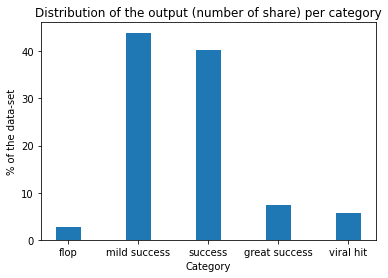

In [6]:
# Complete data-set
Y = pd.read_csv('Dataset/Y1.csv', header=None, names=['shares'])
show_dist_target(Y)

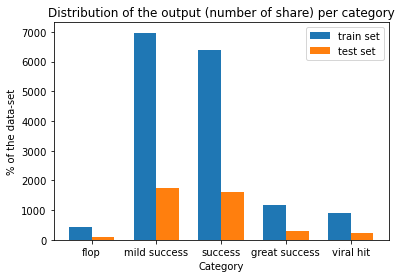

In [7]:
Y_train = pd.read_csv('basic/Y_train.csv').drop(['Unnamed: 0'], axis=1)
Y_test = pd.read_csv('basic/Y_test.csv').drop(['Unnamed: 0'], axis=1)



plt.figure()
width = 0.35
Success_name = ['flop', 'mild success', 'success', 'great success', 'viral hit']

Success_train = Y_train['shares'].apply(success)
Success_val_train = [sum(Success_train == i) for i in range(len(Success_name))]
Success_test = Y_test['shares'].apply(success)
Success_val_test = [sum(Success_test == i) for i in range(len(Success_name))]


plt.bar(Success_name, Success_val_train, -width, align='edge', label='train set')
plt.bar(Success_name, Success_val_test, +width, align='edge', label='test set')

plt.title('Distribution of the output (number of share) per category')
plt.xlabel('Category')
plt.ylabel('% of the data-set')
plt.legend()
plt.show()

---- AllKNN ------


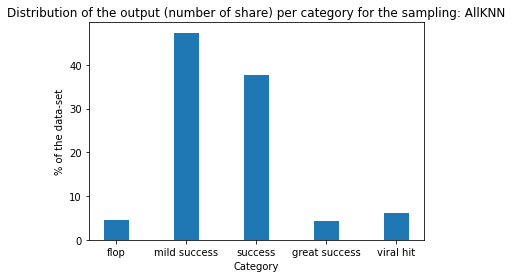

---- Without sampling ------


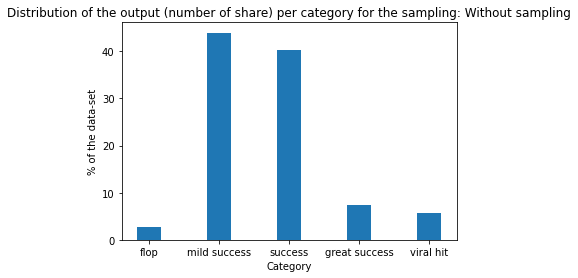

---- BorderlineSMOTE ------


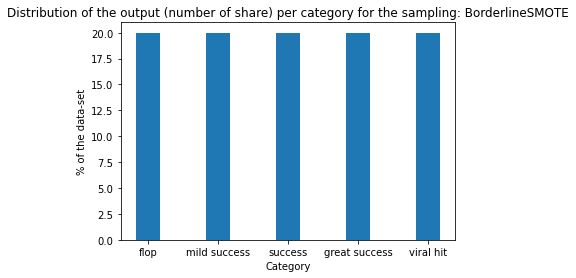

---- ClusterCentroids ------


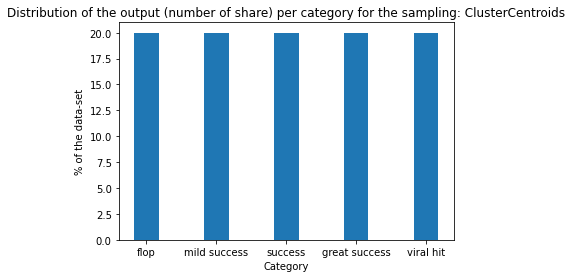

---- InstanceHardnessThreshold ------


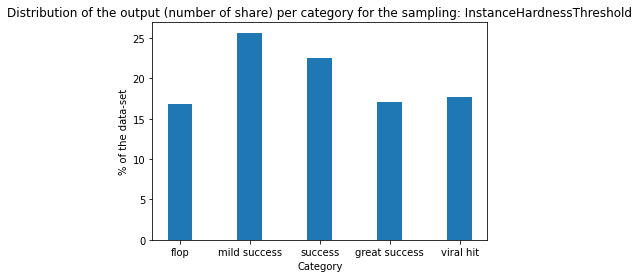

---- RandomOverSampler ------


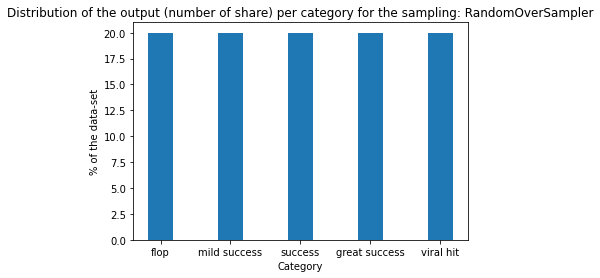

---- RandomUnderSampler ------


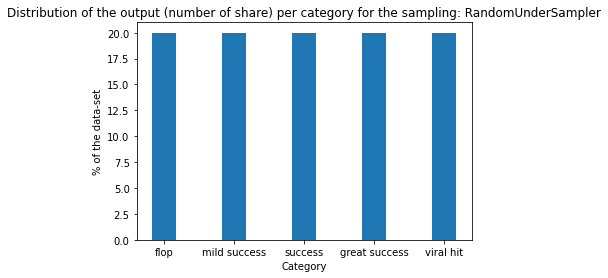

---- SMOTE ------


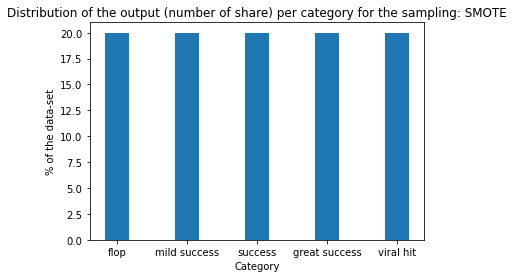

---- SMOTETomek ------


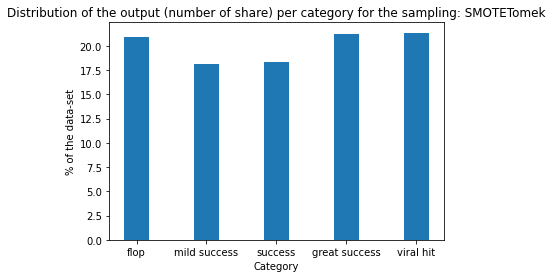

---- TomekLinks ------


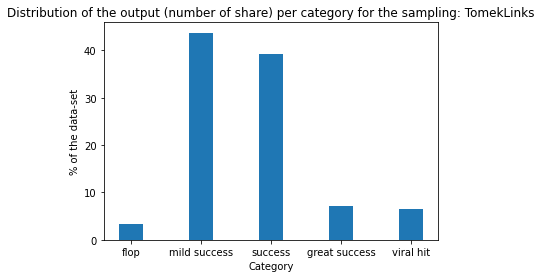

In [8]:
for sampling in samplings:
    print('---- ' + sampling + ' ------')
    if sampling == 'Without sampling':
        Y = pd.read_csv('basic/Y_train.csv').drop(['Unnamed: 0'], axis=1)
    else:
        Y = pd.read_csv(sampling+ '/Y_train.csv').drop(['Unnamed: 0'], axis=1)
    show_dist_target(Y, sampling)

## Linear Regression

In [9]:
"""
pipeline = Pipeline(
    [
        ('preprocessing', StandardScaler()),
        ('feature selection', SelectKBest(score_func=mutual_info_regression, k=40)),
        ('estimator', LinearRegression())
    ]
)
"""

"\npipeline = Pipeline(\n    [\n        ('preprocessing', StandardScaler()),\n        ('feature selection', SelectKBest(score_func=mutual_info_regression, k=40)),\n        ('estimator', LinearRegression())\n    ]\n)\n"

In [10]:
CV_perf_LR = [0.4880169403905369, 0.48492968510199247, 0.6533104066145896, 0.6530550484404509, 0.7187993491999543, 
           0.658082785784371, 0.6504562497994655, 0.6691310632864133, 0.6804072004539296, 0.49330143496802614]
Test_perf_LR = [0.5155796529144044, 0.4940072047443733, 0.538793911676854, 0.5008129443584516, 0.5165378140425584,
             0.5304890443406005, 0.5246102643155394, 0.534839322359256, 0.5311279963668307, 0.5031647957041181]

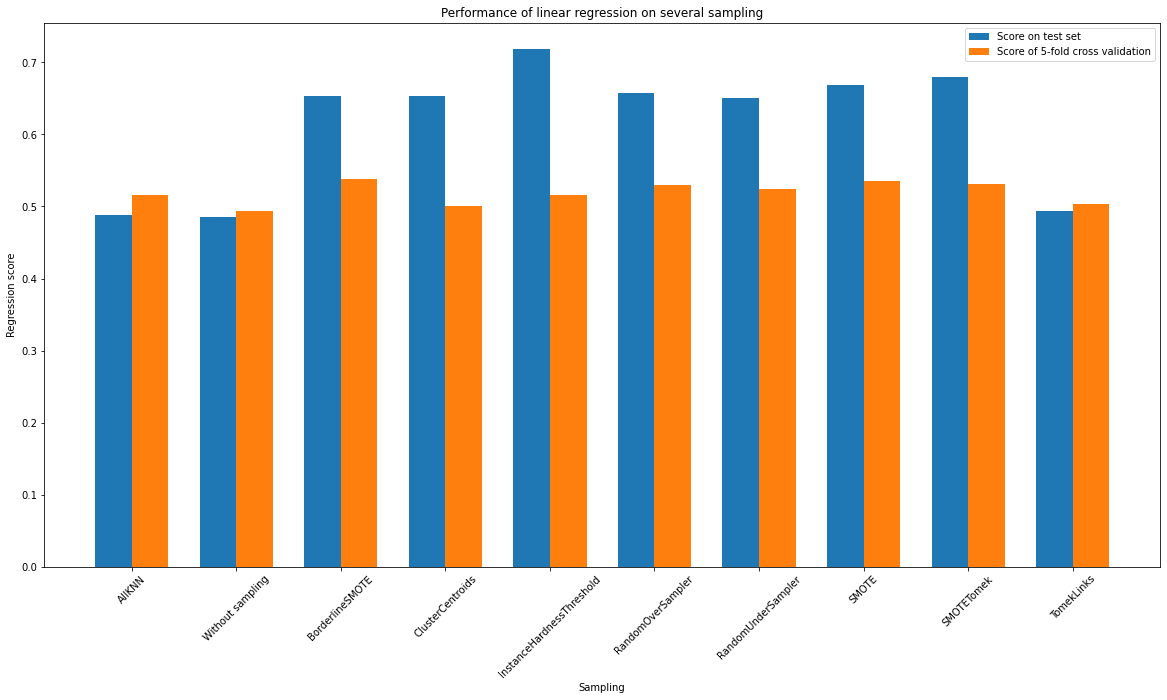

In [11]:
show_perf(CV_perf_LR, Test_perf_LR, 'linear regression')

## MLP

In [12]:
"""
pipeline = Pipeline(
    [
        ('preprocessing', StandardScaler()),
        ('feature selection', SelectKBest(score_func=mutual_info_regression, k=30)),
        ('estimator', MLPRegressor(hidden_layer_sizes=(150,)*5, batch_size=750, beta_1=0.8, beta_2=0.97, learning_rate_init=0.003,
                                   solver='adam', activation='relu', max_iter=600, early_stopping=False, n_iter_no_change=10, random_state=0
                                ))
    ]
)
"""

"\npipeline = Pipeline(\n    [\n        ('preprocessing', StandardScaler()),\n        ('feature selection', SelectKBest(score_func=mutual_info_regression, k=30)),\n        ('estimator', MLPRegressor(hidden_layer_sizes=(150,)*5, batch_size=750, beta_1=0.8, beta_2=0.97, learning_rate_init=0.003,\n                                   solver='adam', activation='relu', max_iter=600, early_stopping=False, n_iter_no_change=10, random_state=0\n                                ))\n    ]\n)\n"

In [13]:
CV_perf_MLP = [0.4902466455047446, 0.48579459517296153, 0.8054812468094257, 0.6432150465254424, 0.7196429119087664,
           0.8134941816521867, 0.6248408181785977, 0.7969758941720201, 0.7946863967488894, 0.5061612615344608]
Test_perf_MLP = [0.5143501877856447, 0.4962003009587694, 0.495264326310834, 0.5203321175306763, 0.5451969988372145,
             0.49207853234144333, 0.5204589275770385, 0.49922013359156847, 0.5016882434413497, 0.4925733966375351]

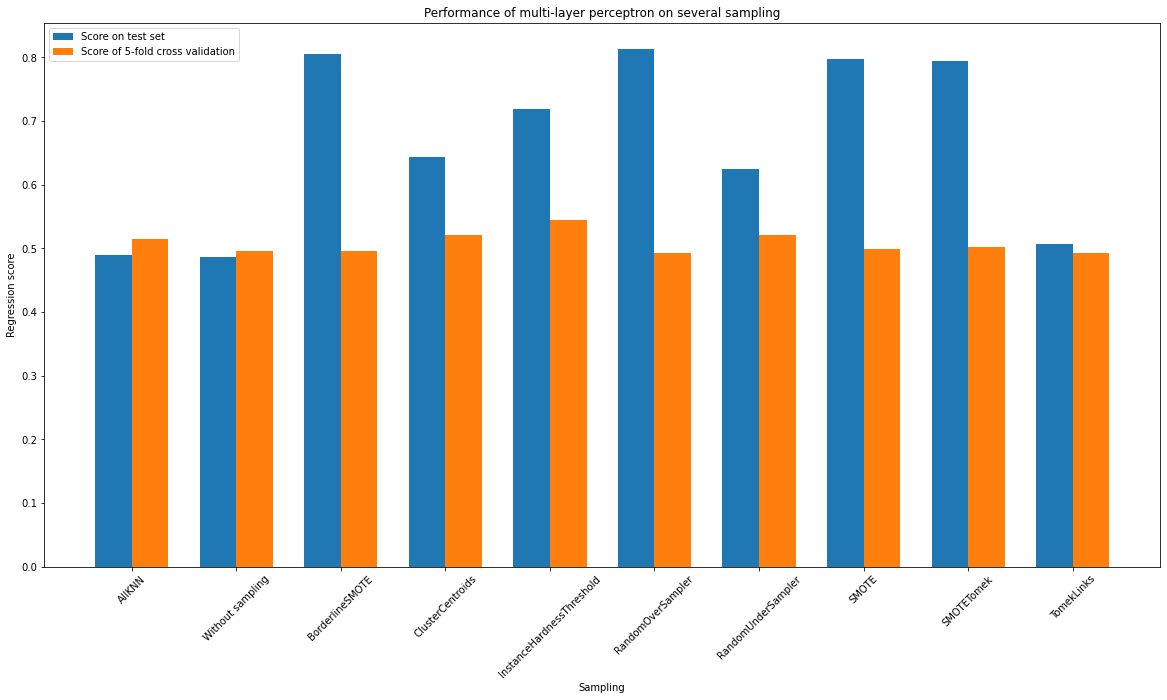

In [14]:
show_perf(CV_perf_MLP, Test_perf_MLP, 'multi-layer perceptron')

## RF

In [15]:
"""
pipeline = Pipeline(
    [
        ('preprocessing', StandardScaler()),
        ('feature selection', SelectKBest(score_func=mutual_info_regression, k=40)),
        ('estimator', RandomForestRegressor(n_estimators=150, max_depth=40, min_samples_split=3, min_samples_leaf=5,
                                            max_features='auto', criterion='mse', max_leaf_nodes=2000,
                                            bootstrap=True, random_state=0, n_jobs=-1))
    ]
)
"""

"\npipeline = Pipeline(\n    [\n        ('preprocessing', StandardScaler()),\n        ('feature selection', SelectKBest(score_func=mutual_info_regression, k=40)),\n        ('estimator', RandomForestRegressor(n_estimators=150, max_depth=40, min_samples_split=3, min_samples_leaf=5,\n                                            max_features='auto', criterion='mse', max_leaf_nodes=2000,\n                                            bootstrap=True, random_state=0, n_jobs=-1))\n    ]\n)\n"

In [16]:
CV_perf_RF = [0.5250473027652203, 0.5168888850424185, 0.8200856195984103, 0.6823816271324036, 0.7688810698461181, 
              0.8709665612186921, 0.6688123658617028, 0.7868518445164858, 0.7928538959326156, 0.5258432048966505]
Test_perf_RF = [0.5413671330151946, 0.5243610006833856, 0.5423577392253137, 0.516925797480817, 0.5378438917668098,
                0.5314811740360106, 0.5373189662464495, 0.5475131766571258, 0.5499265790369373, 0.5303224463933037]

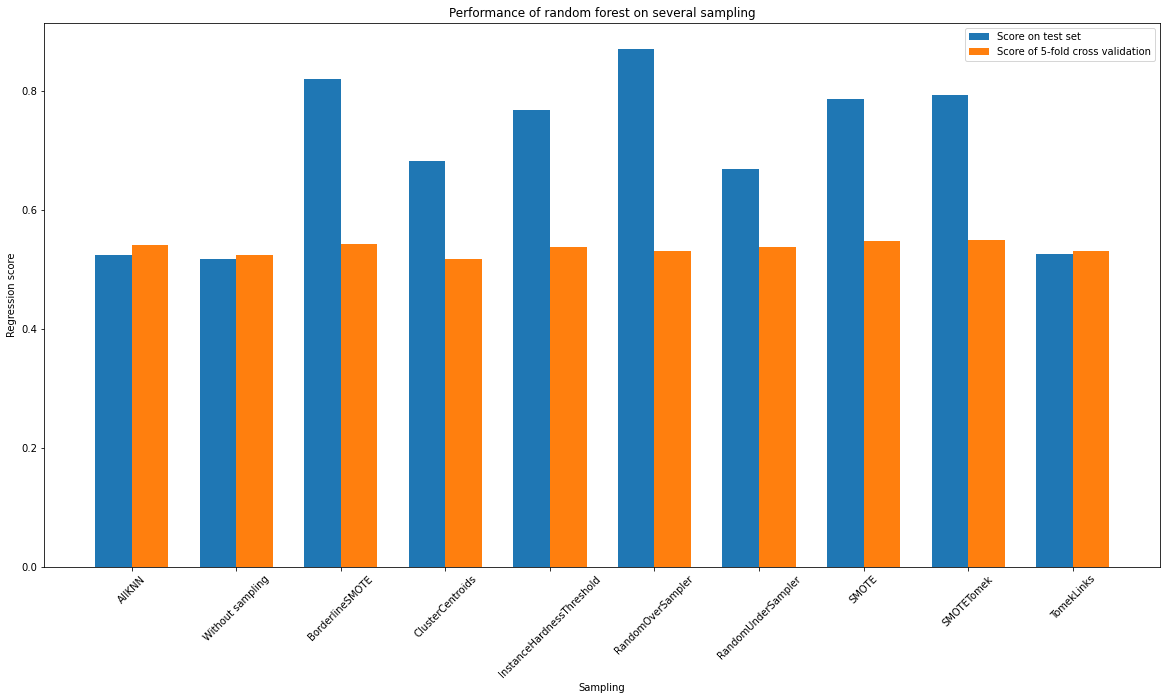

In [17]:
show_perf(CV_perf_RF, Test_perf_RF, 'random forest')

## KNN

In [18]:
CV_perf_KNN = [0.5017821823917569, 0.4938657495069214, 0.8239534528604011, 0.6376305147798647, 0.7418337758185969,
               0.8075933976587736, 0.6386960683121373, 0.7956872401437171, 0.804380678486952, 0.5114588551726339]
Test_perf_KNN = [0.5247154993288771, 0.5092110940502437, 0.5291600036948589, 0.5170716903914068, 0.5417600101472573,
                0.5114032656986974, 0.5267730306195235, 0.5322773558018203, 0.5315964641813694, 0.5241025647661642]

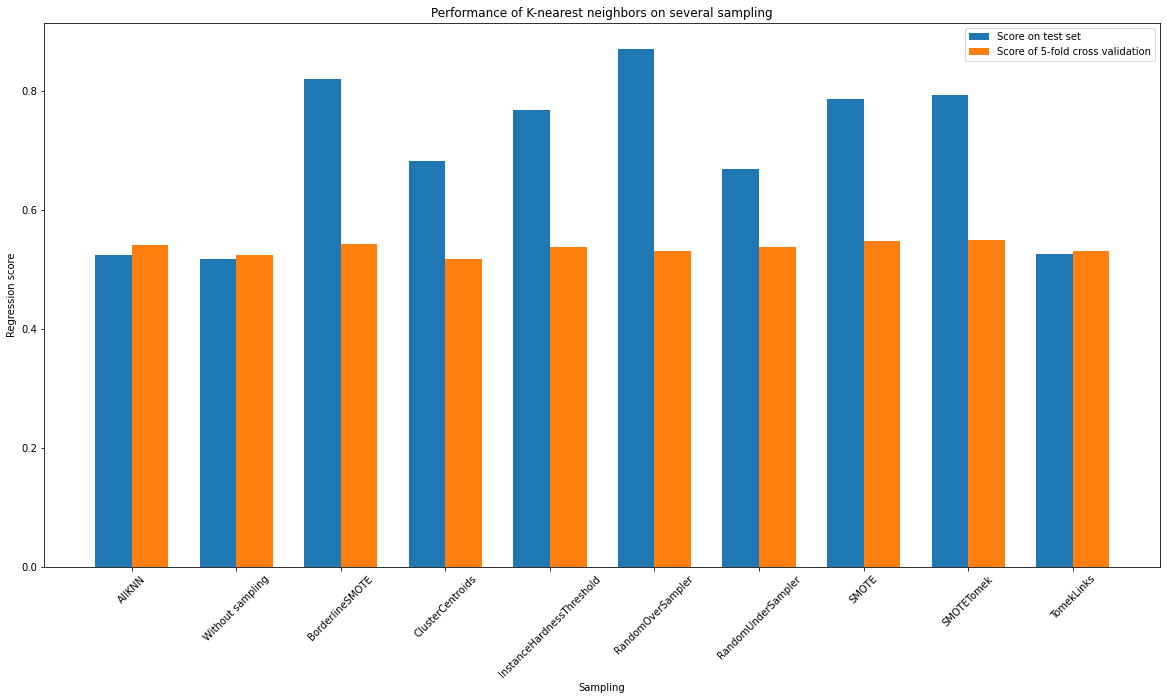

In [19]:
show_perf(CV_perf_RF, Test_perf_RF, 'K-nearest neighbors')

## Voting